In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

c:\Users\alsou\Documents\Code\number_classification_cnn\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 22.0M/22.0M [00:04<00:00, 5.25MB/s]

Extracting files...


Path to dataset files: C:\Users\alsou\.cache\kagglehub\datasets\hojjatk\mnist-dataset\versions\1


In [3]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)  

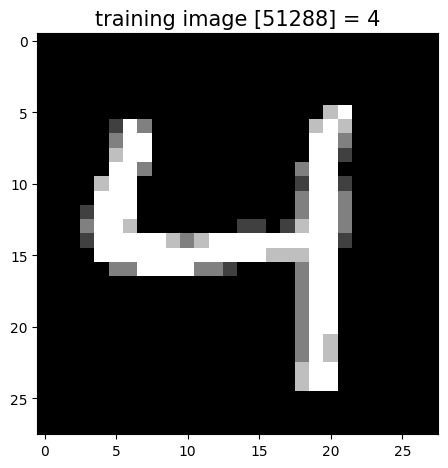

In [4]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = r"C:\Users\alsou\.cache\kagglehub\datasets\hojjatk\mnist-dataset\versions\1"
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
# for i in range(0, 10):
#     r = random.randint(1, 60000)
#     images_2_show.append(x_train[r])
#     titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))

# for i in range(0, 5):
#     r = random.randint(1, 10000)
#     images_2_show.append(x_test[r])        
#     titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

r = random.randint(1, 60000)    
images_2_show.append(x_train[r])
titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))


show_images(images_2_show, titles_2_show)

lecun tanh method

In [7]:
import math

def activation_function(input):
    #1.7159 tanh(2/3*x)
    output = 1.7159 * math.tanh(input * 2/3)
    # print(output)
    return output

Initializing Weights

In [ ]:
import numpy as np
import torch

#5x5
layer_1_kernels = []
for iter in range(6):
    kernel = [torch.randn(5,5)]



INITIAL
ADDING PADDING

tensor([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0, 191, 255,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,

C:\Users\alsou\AppData\Local\Temp\ipykernel_29068\2968623201.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  tensor_image = torch.tensor(images_2_show)


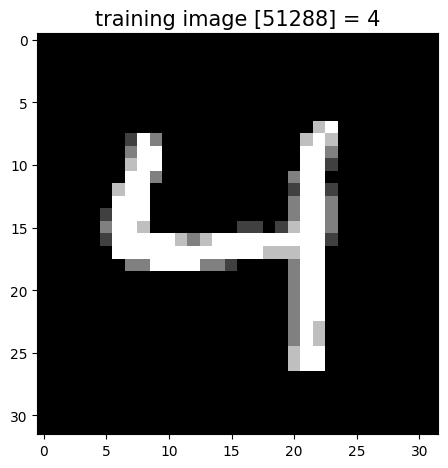

In [5]:
import torch
import torch.nn as nn


tensor_image = torch.tensor(images_2_show)
print(tensor_image)
pad = nn.ZeroPad2d(padding=2)
padded_image = pad(tensor_image)

show_images(padded_image, titles_2_show)

# LAYER 1
convolution kernel filter #1\
kernel: 5x5\
input: 32x32x1\
output: 28x28x6

tensor([[ 1.0692e+00,  1.2077e-02, -5.8036e-01,  8.9056e-01, -1.2563e+00,
          9.7478e-01, -6.3150e-01,  5.2924e-01, -6.7570e-01, -6.7325e-01,
         -4.1143e-01,  1.5488e-01,  5.2662e-01,  1.1645e+00, -1.0339e+00,
         -1.0744e+00, -1.0658e+00,  1.3610e+00, -7.1306e-01, -1.2197e+00,
          1.2046e+00,  9.2965e-01, -1.1476e+00,  1.6384e+00,  3.0508e-01,
          6.2110e-01,  4.4033e-01, -1.2713e+00],
        [-9.6913e-01, -1.4264e+00, -2.0942e-01,  3.4265e-01, -1.2067e+00,
          6.3715e-01, -1.1341e+00,  1.5431e-01, -1.1038e+00,  1.1138e+00,
          2.6345e-01,  1.1654e+00, -1.1442e+00, -4.2046e-01,  1.1940e+00,
         -3.4112e-01,  1.4684e-01,  1.1366e+00,  4.4158e-02,  8.9327e-01,
          1.4034e+00, -7.7911e-02,  9.9698e-01, -1.9572e-01, -2.6939e-02,
         -1.4839e+00, -1.0686e-01,  1.4690e+00],
        [ 1.2087e+00, -1.4453e+00,  1.5792e-03, -1.1586e+00,  1.5584e+00,
          6.1864e-01, -1.0042e+00,  2.1655e-01, -1.2721e+00,  1.2740e-01,
          1.09

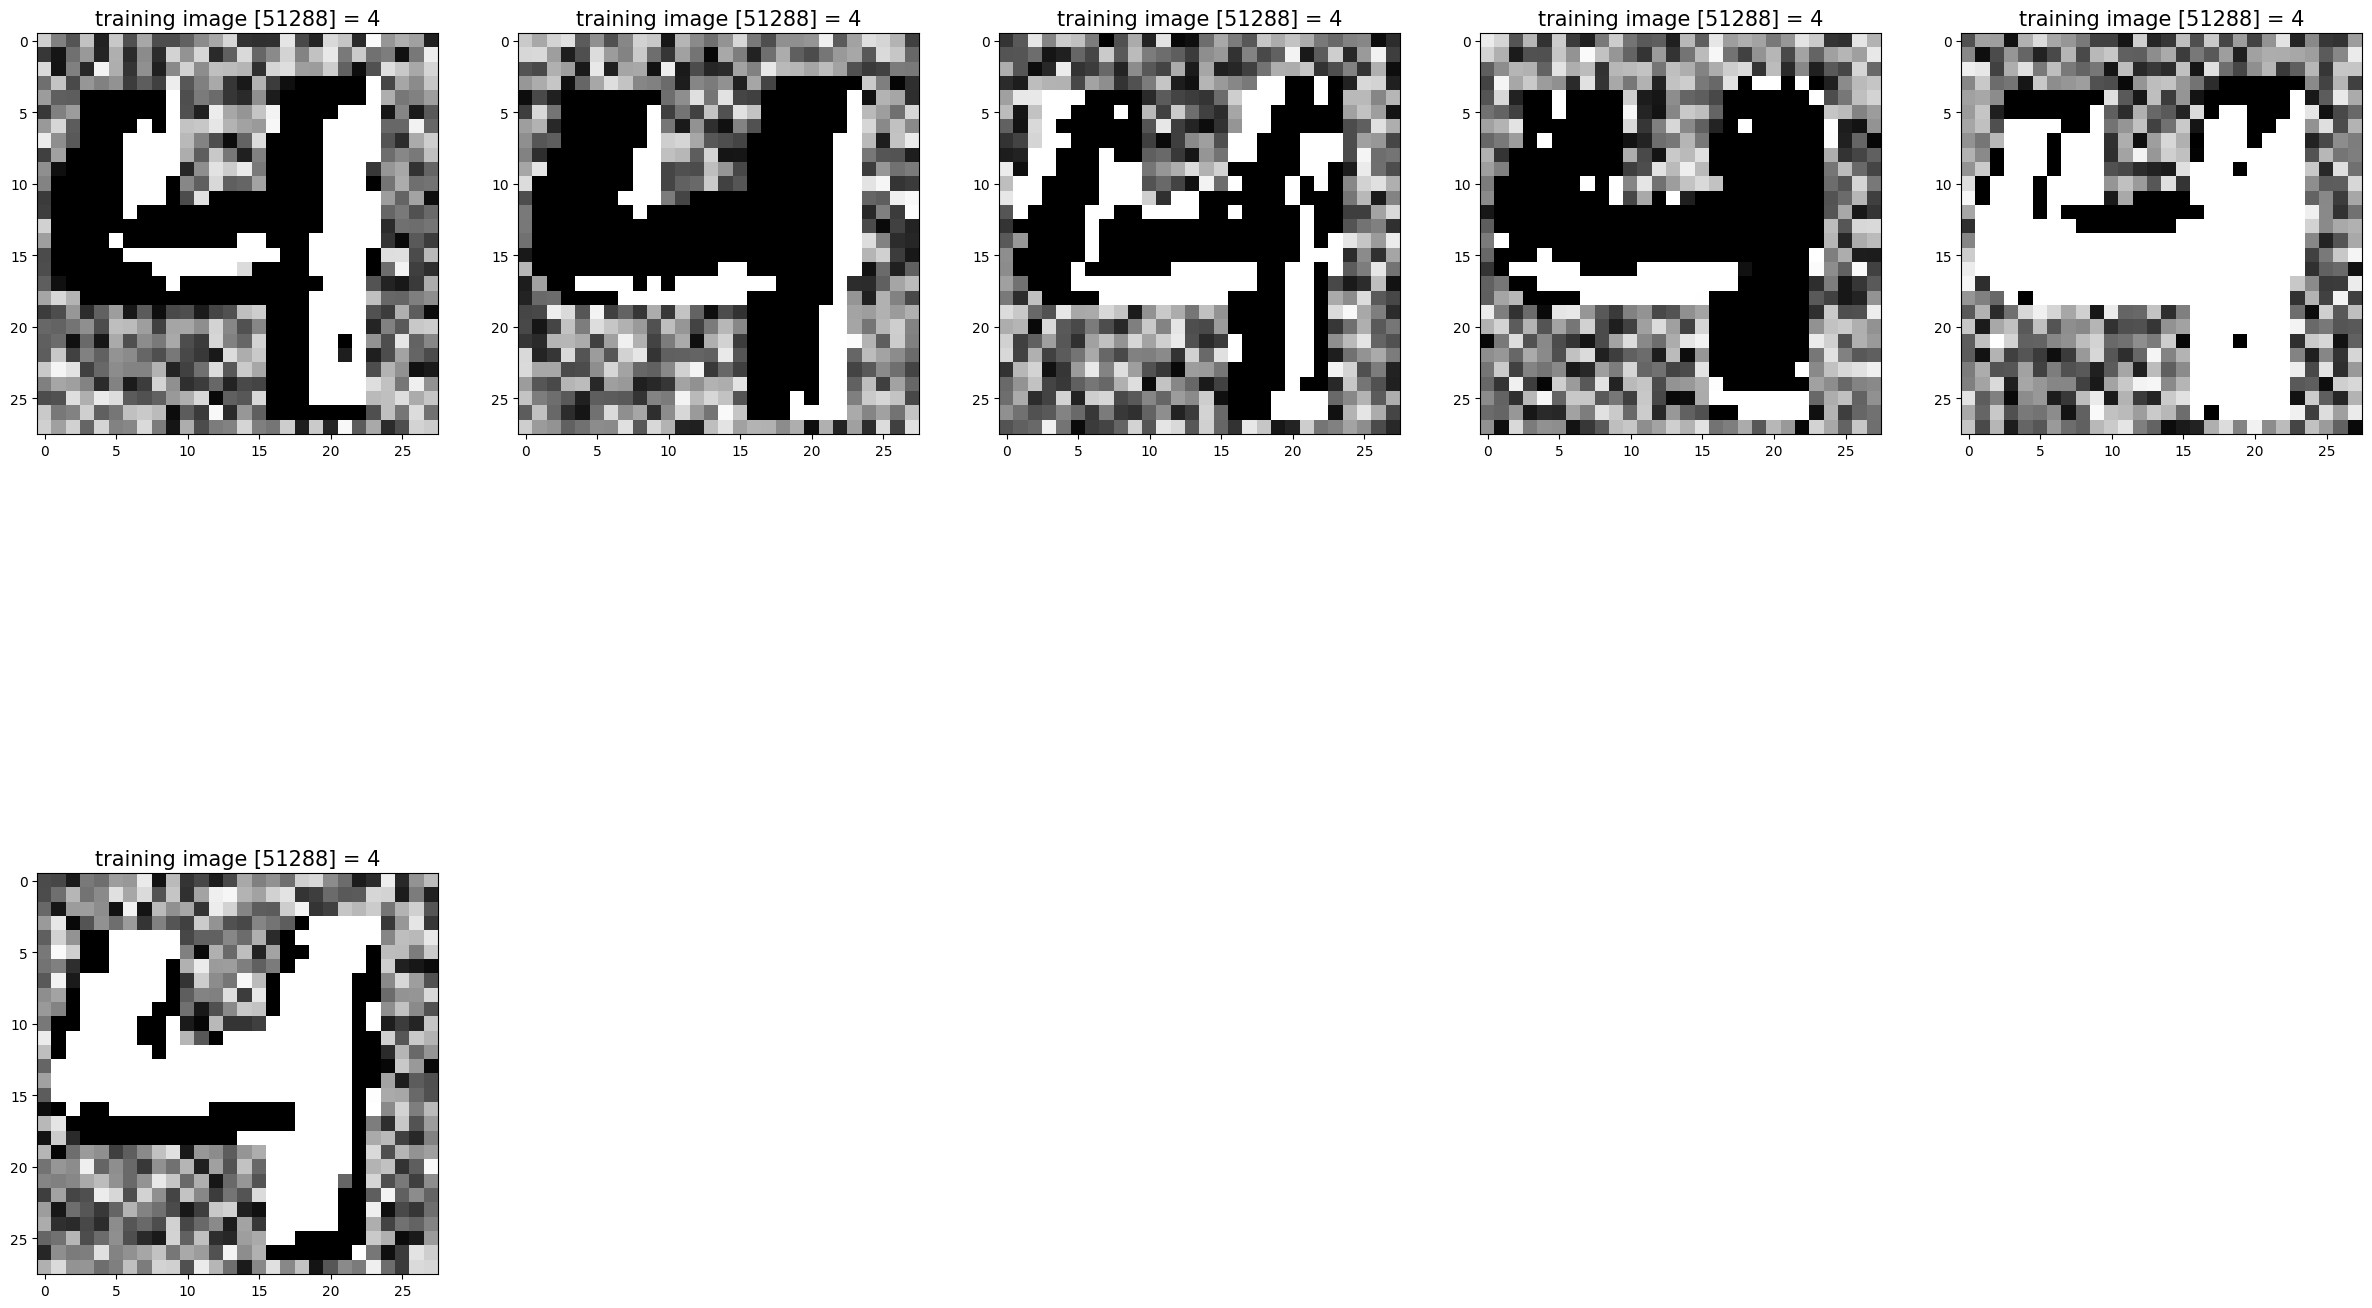

In [8]:

import numpy as np
import torch

def apply_kernel(img, kernel):
    return np.sum(np.multiply(img, kernel))

imgs_layer_1 = []
image = padded_image[0]
for iter in range(6):
    kernel = [torch.randn(5,5)]
    image_post_kernal = []
    for i in range(5,len(image)+1):
        row = []
        for j in range(5,len(image)+1):
            row.append(apply_kernel([image[i-5:i,j-5:j]], kernel))
        image_post_kernal.append(row)
    imgs_layer_1.append(torch.tensor(image_post_kernal))

#BIAS
for iter in range(6):
    bias_28x28 = torch.randn(28,28)
    imgs_layer_1[iter] += bias_28x28
# print(torch.flatten(imgs_layer_1[iter]))

# ACTIVATION
for iter in range(6):
    for i in range(len(imgs_layer_1[iter])):
        for j in range(len(imgs_layer_1[iter][0])):
            imgs_layer_1[iter][i][j] = activation_function(imgs_layer_1[iter][i][j])
print(imgs_layer_1[0])
show_images(imgs_layer_1, titles_2_show*6)


#LAYER 2
convolution max pooling layer #1\
kernel: 2x2\
input: 28x28x6\
output: 14x14x6

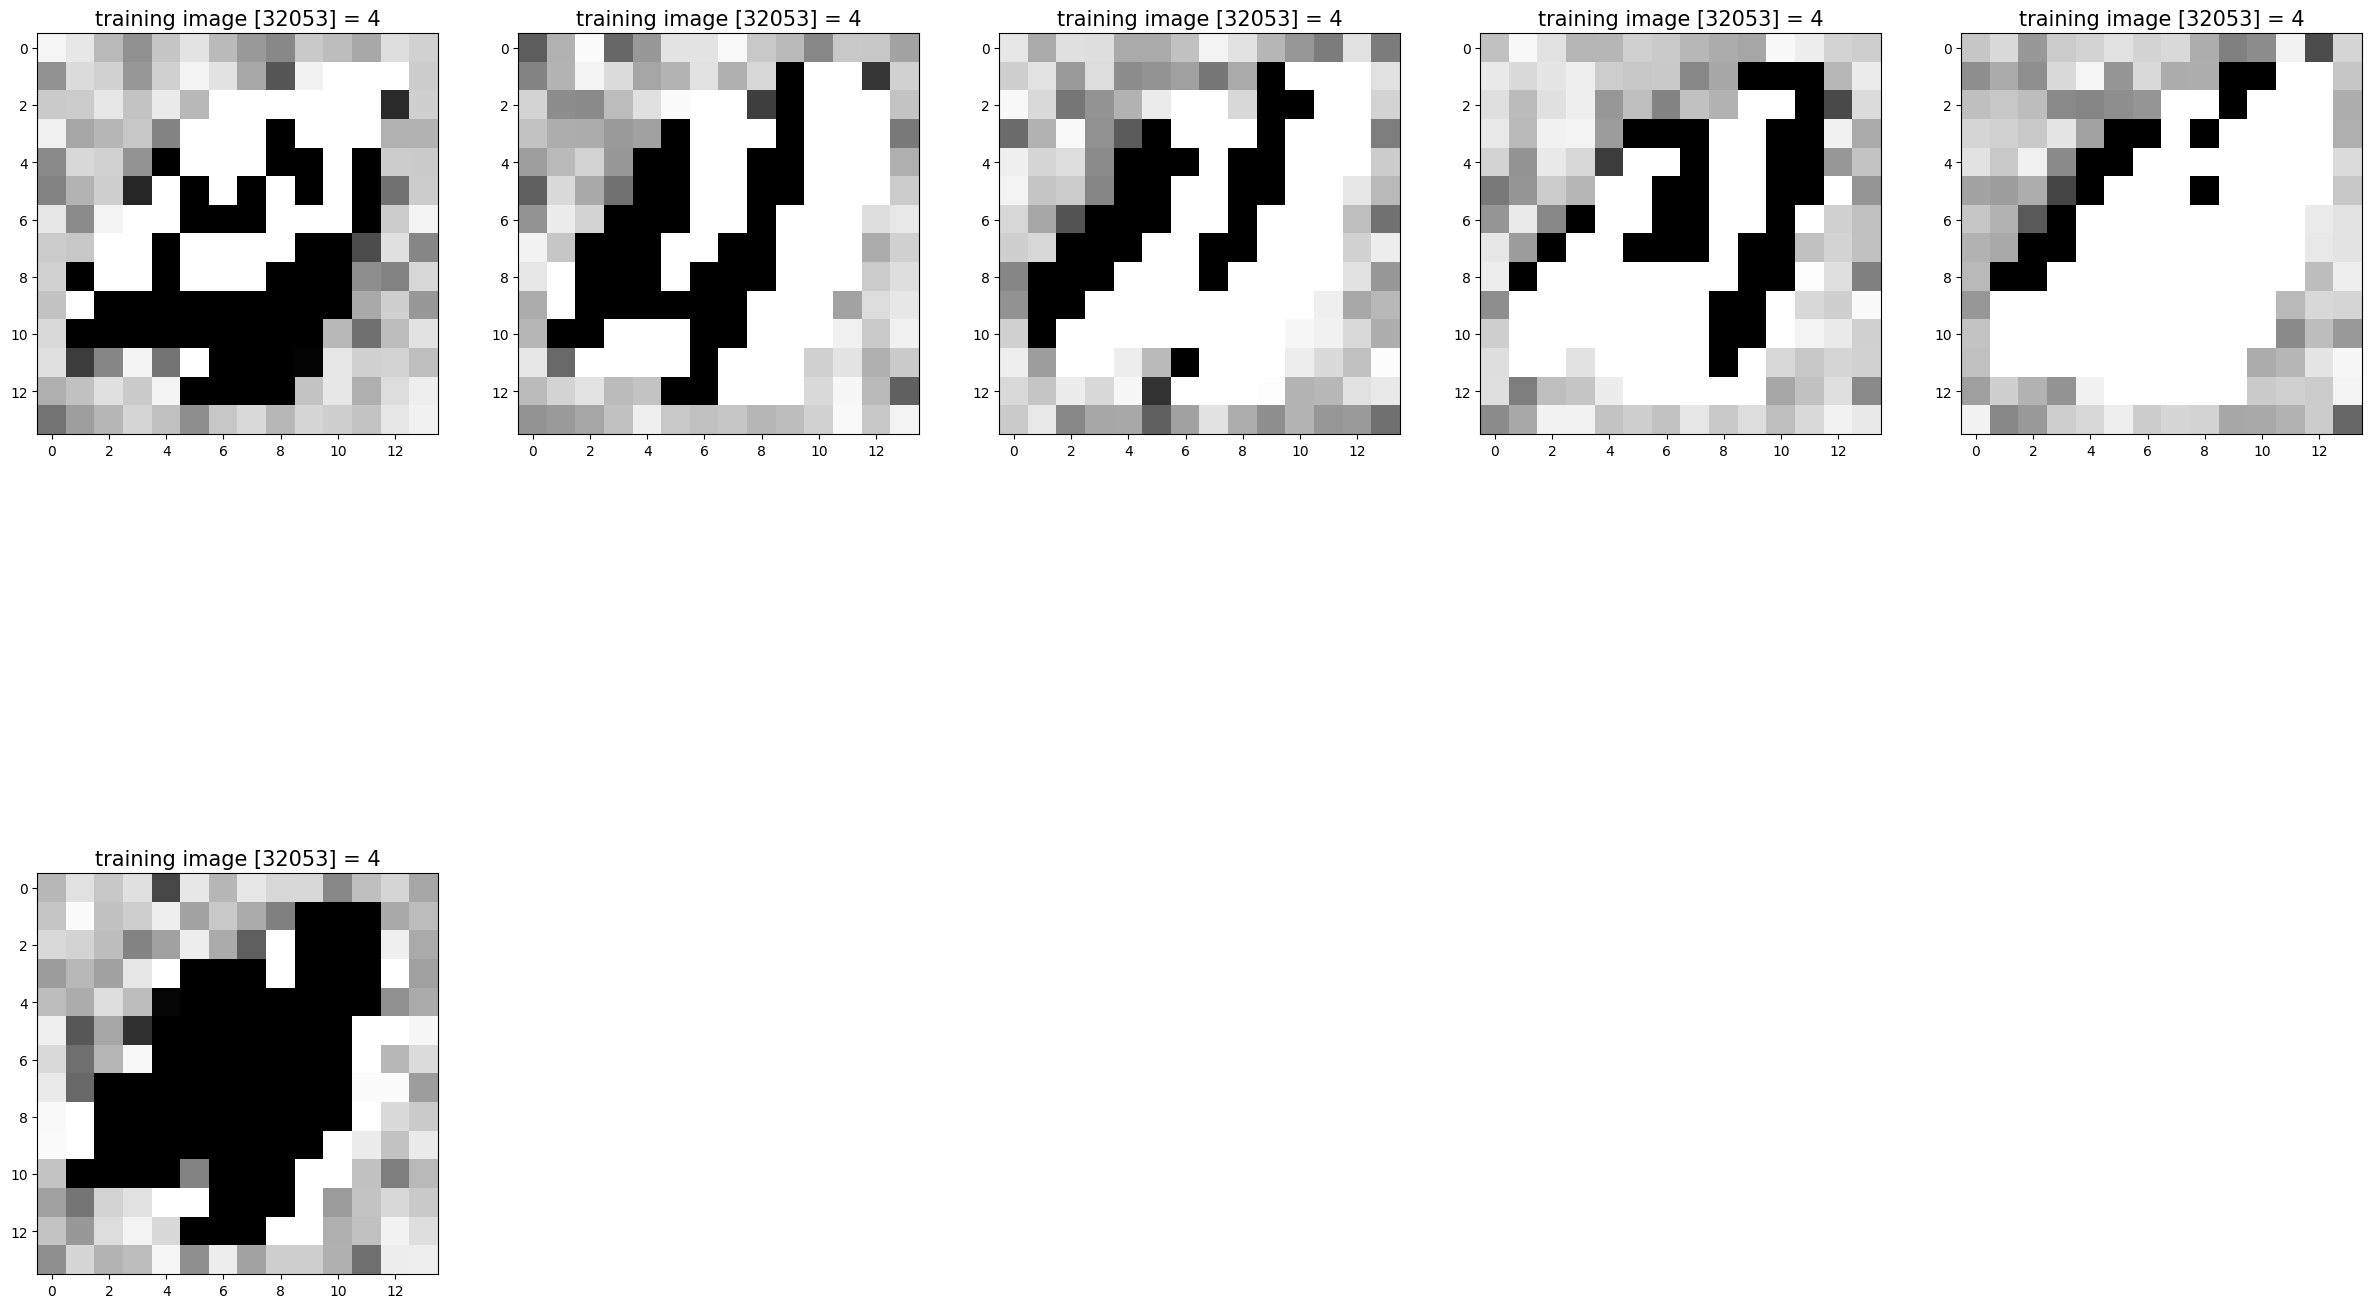

In [10]:

import numpy as np

layer_2_max_filter = []

for images in imgs_layer_1:
    imgs = []
    for i in range(2,len(images)+1,2):
        row = []
        for j in range(2,len(images)+1,2):
            row.append(np.max([images[i-2:i,j-2:j]]))
        imgs.append(row)
    layer_2_max_filter.append(torch.tensor(imgs))

show_images(layer_2_max_filter, titles_2_show*6)


# LAYER 3
convolution kernel filter #2\
kernel: 5x5x6\
input: 14x14x6\
output: 10x10x16

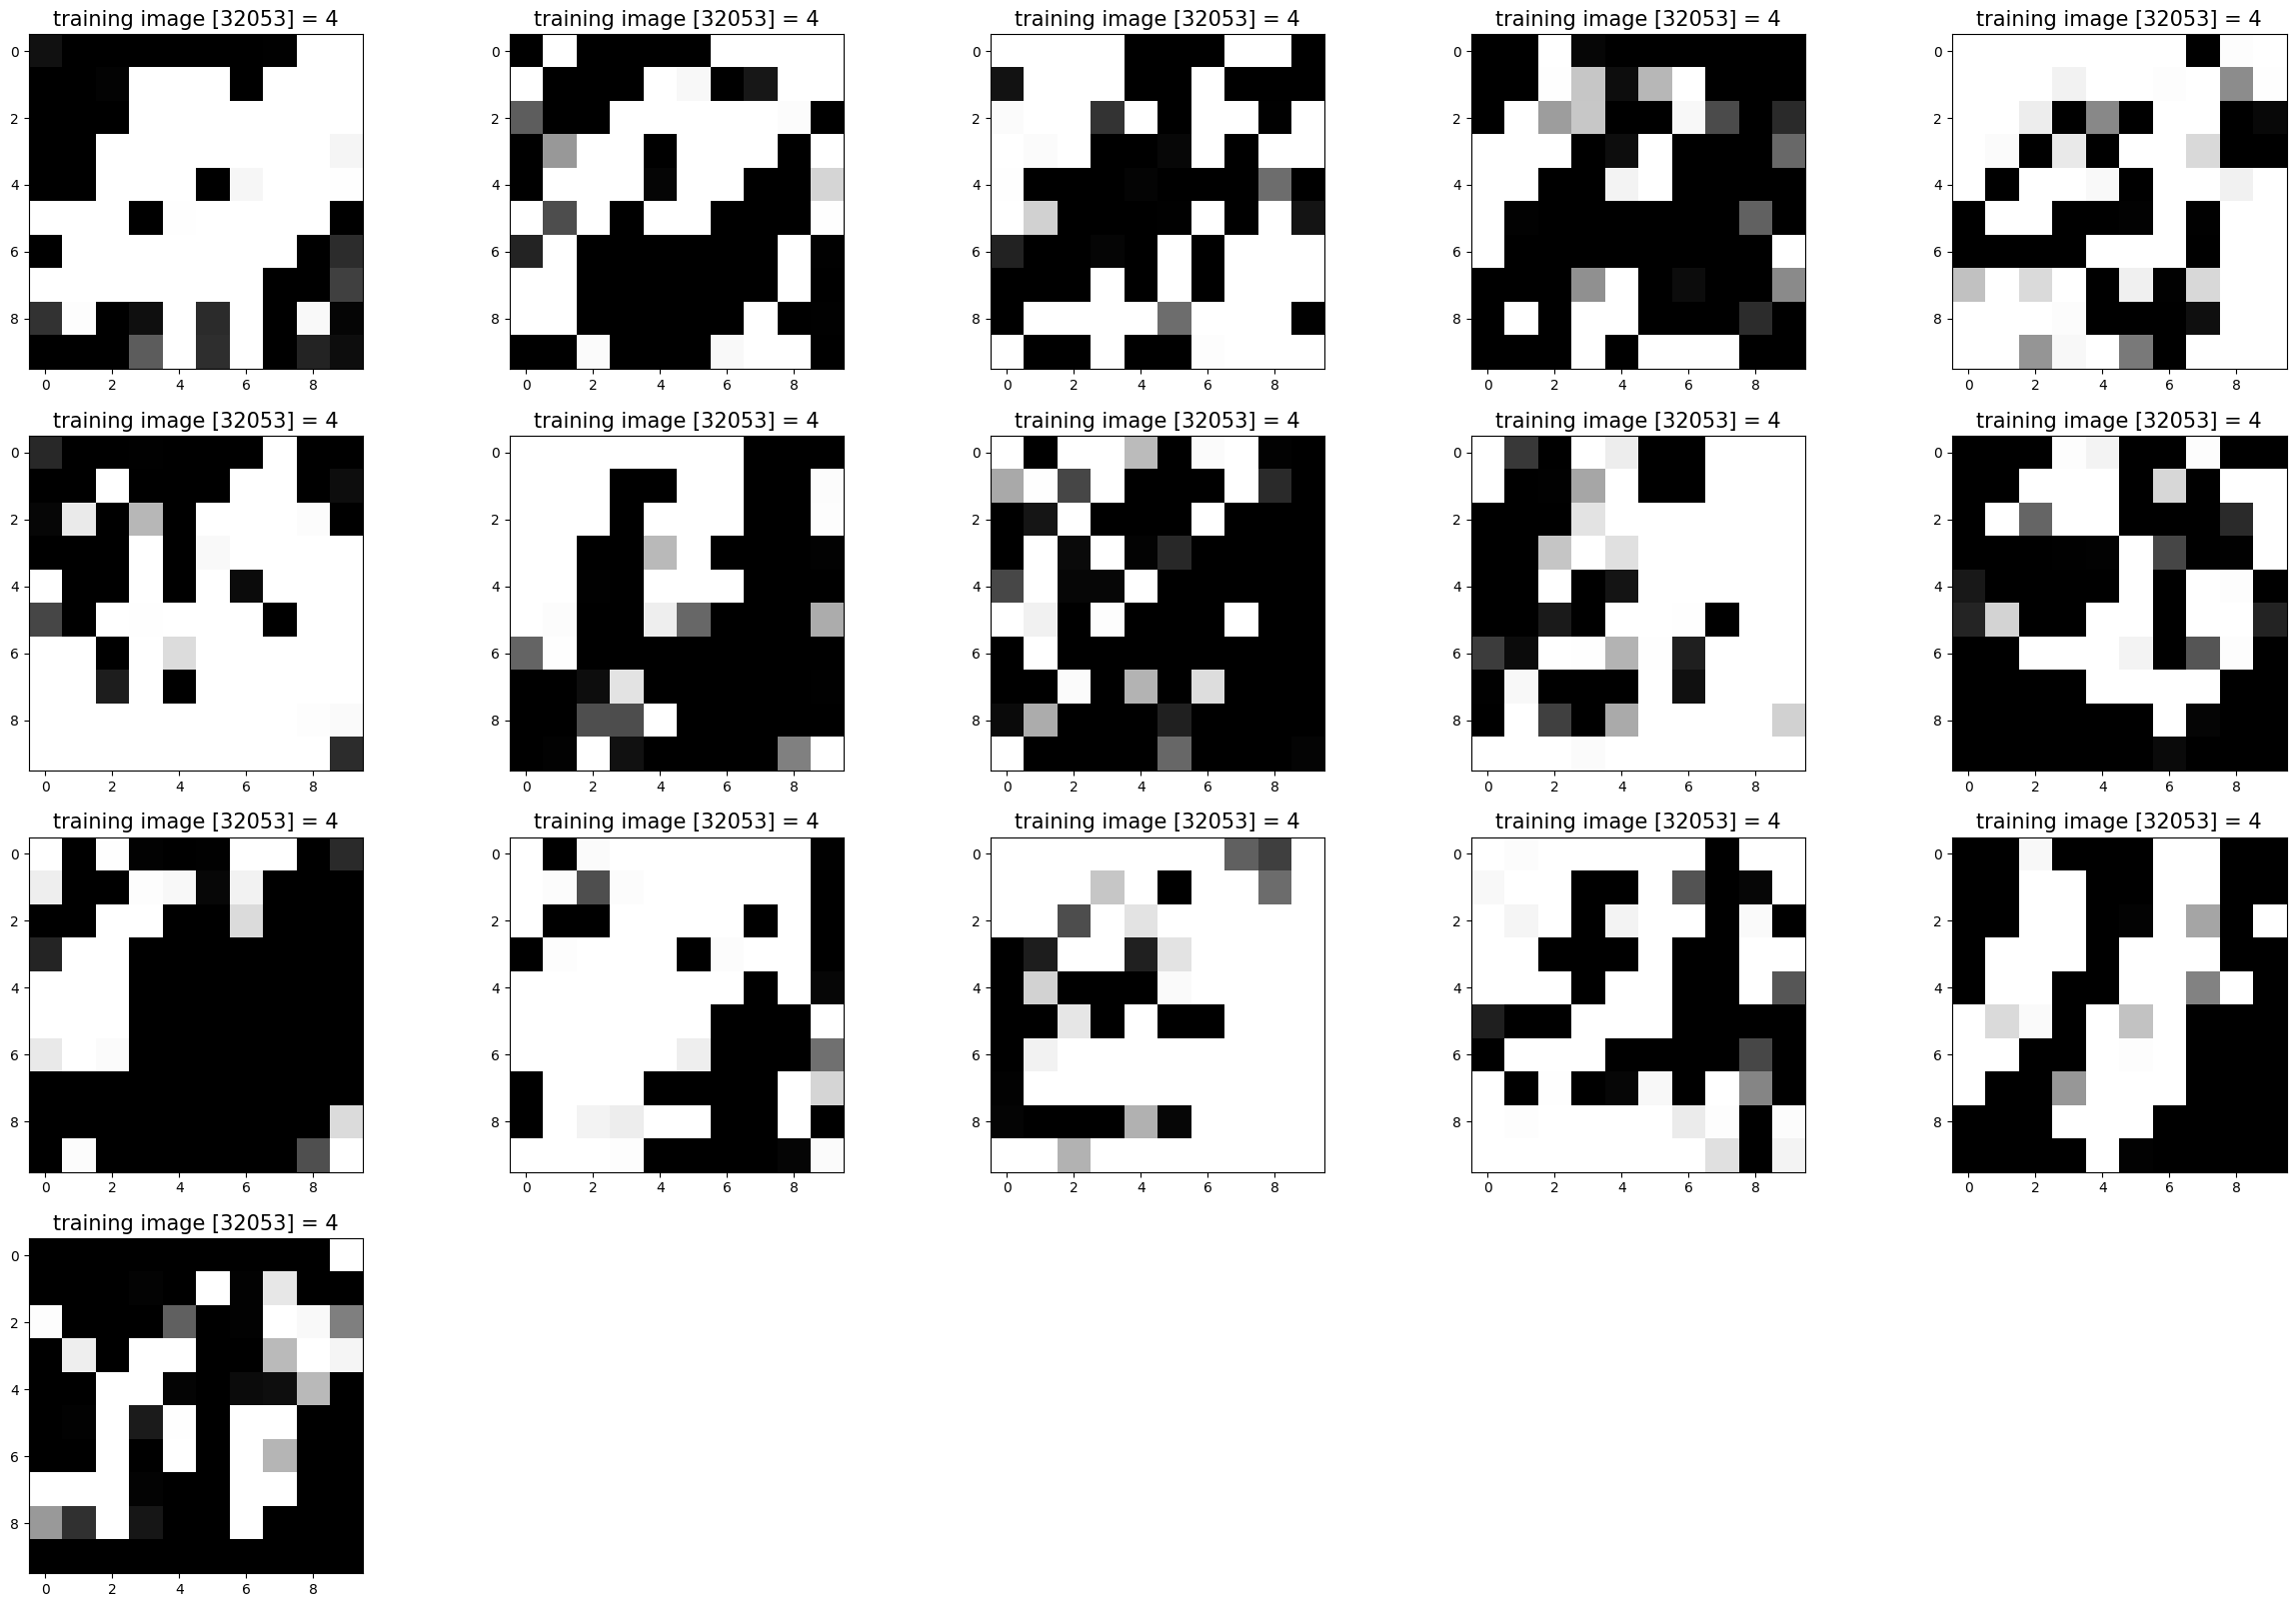

In [11]:
import numpy as np

def apply_kernel(img, kernel):
    return np.sum(np.multiply(img, kernel))

layer_3_5x5x6_conv_filter = []
for filters in range(16):
    kernel = [torch.randn(6,5,5)]
    # [z y x]
    
    images = layer_2_max_filter[0]
    image_post_kernal = []
    for i in range(5,len(images)+1):
        row = []
        for j in range(5,len(images)+1):
            temp_5x5x6 = []
            for iter in range(len(layer_2_max_filter)):
                image = layer_2_max_filter[iter]
                temp_5x5x6.append(image[i-5:i,j-5:j])
            row.append(apply_kernel(temp_5x5x6, kernel))
        image_post_kernal.append(row)
    layer_3_5x5x6_conv_filter.append(torch.tensor(image_post_kernal))
    
#BIAS
for iter in range(16):
    bias_14x14 = torch.randn(10,10)
    layer_3_5x5x6_conv_filter[iter] += bias_14x14

for iter in range(16):
    for i in range(len(layer_3_5x5x6_conv_filter[iter])):
        for j in range(len(layer_3_5x5x6_conv_filter[iter][0])):
            layer_3_5x5x6_conv_filter[iter][i][j] = activation_function(layer_3_5x5x6_conv_filter[iter][i][j])

show_images(layer_3_5x5x6_conv_filter, titles_2_show*16)


LAYER 4
convolution max filter #2
2x2

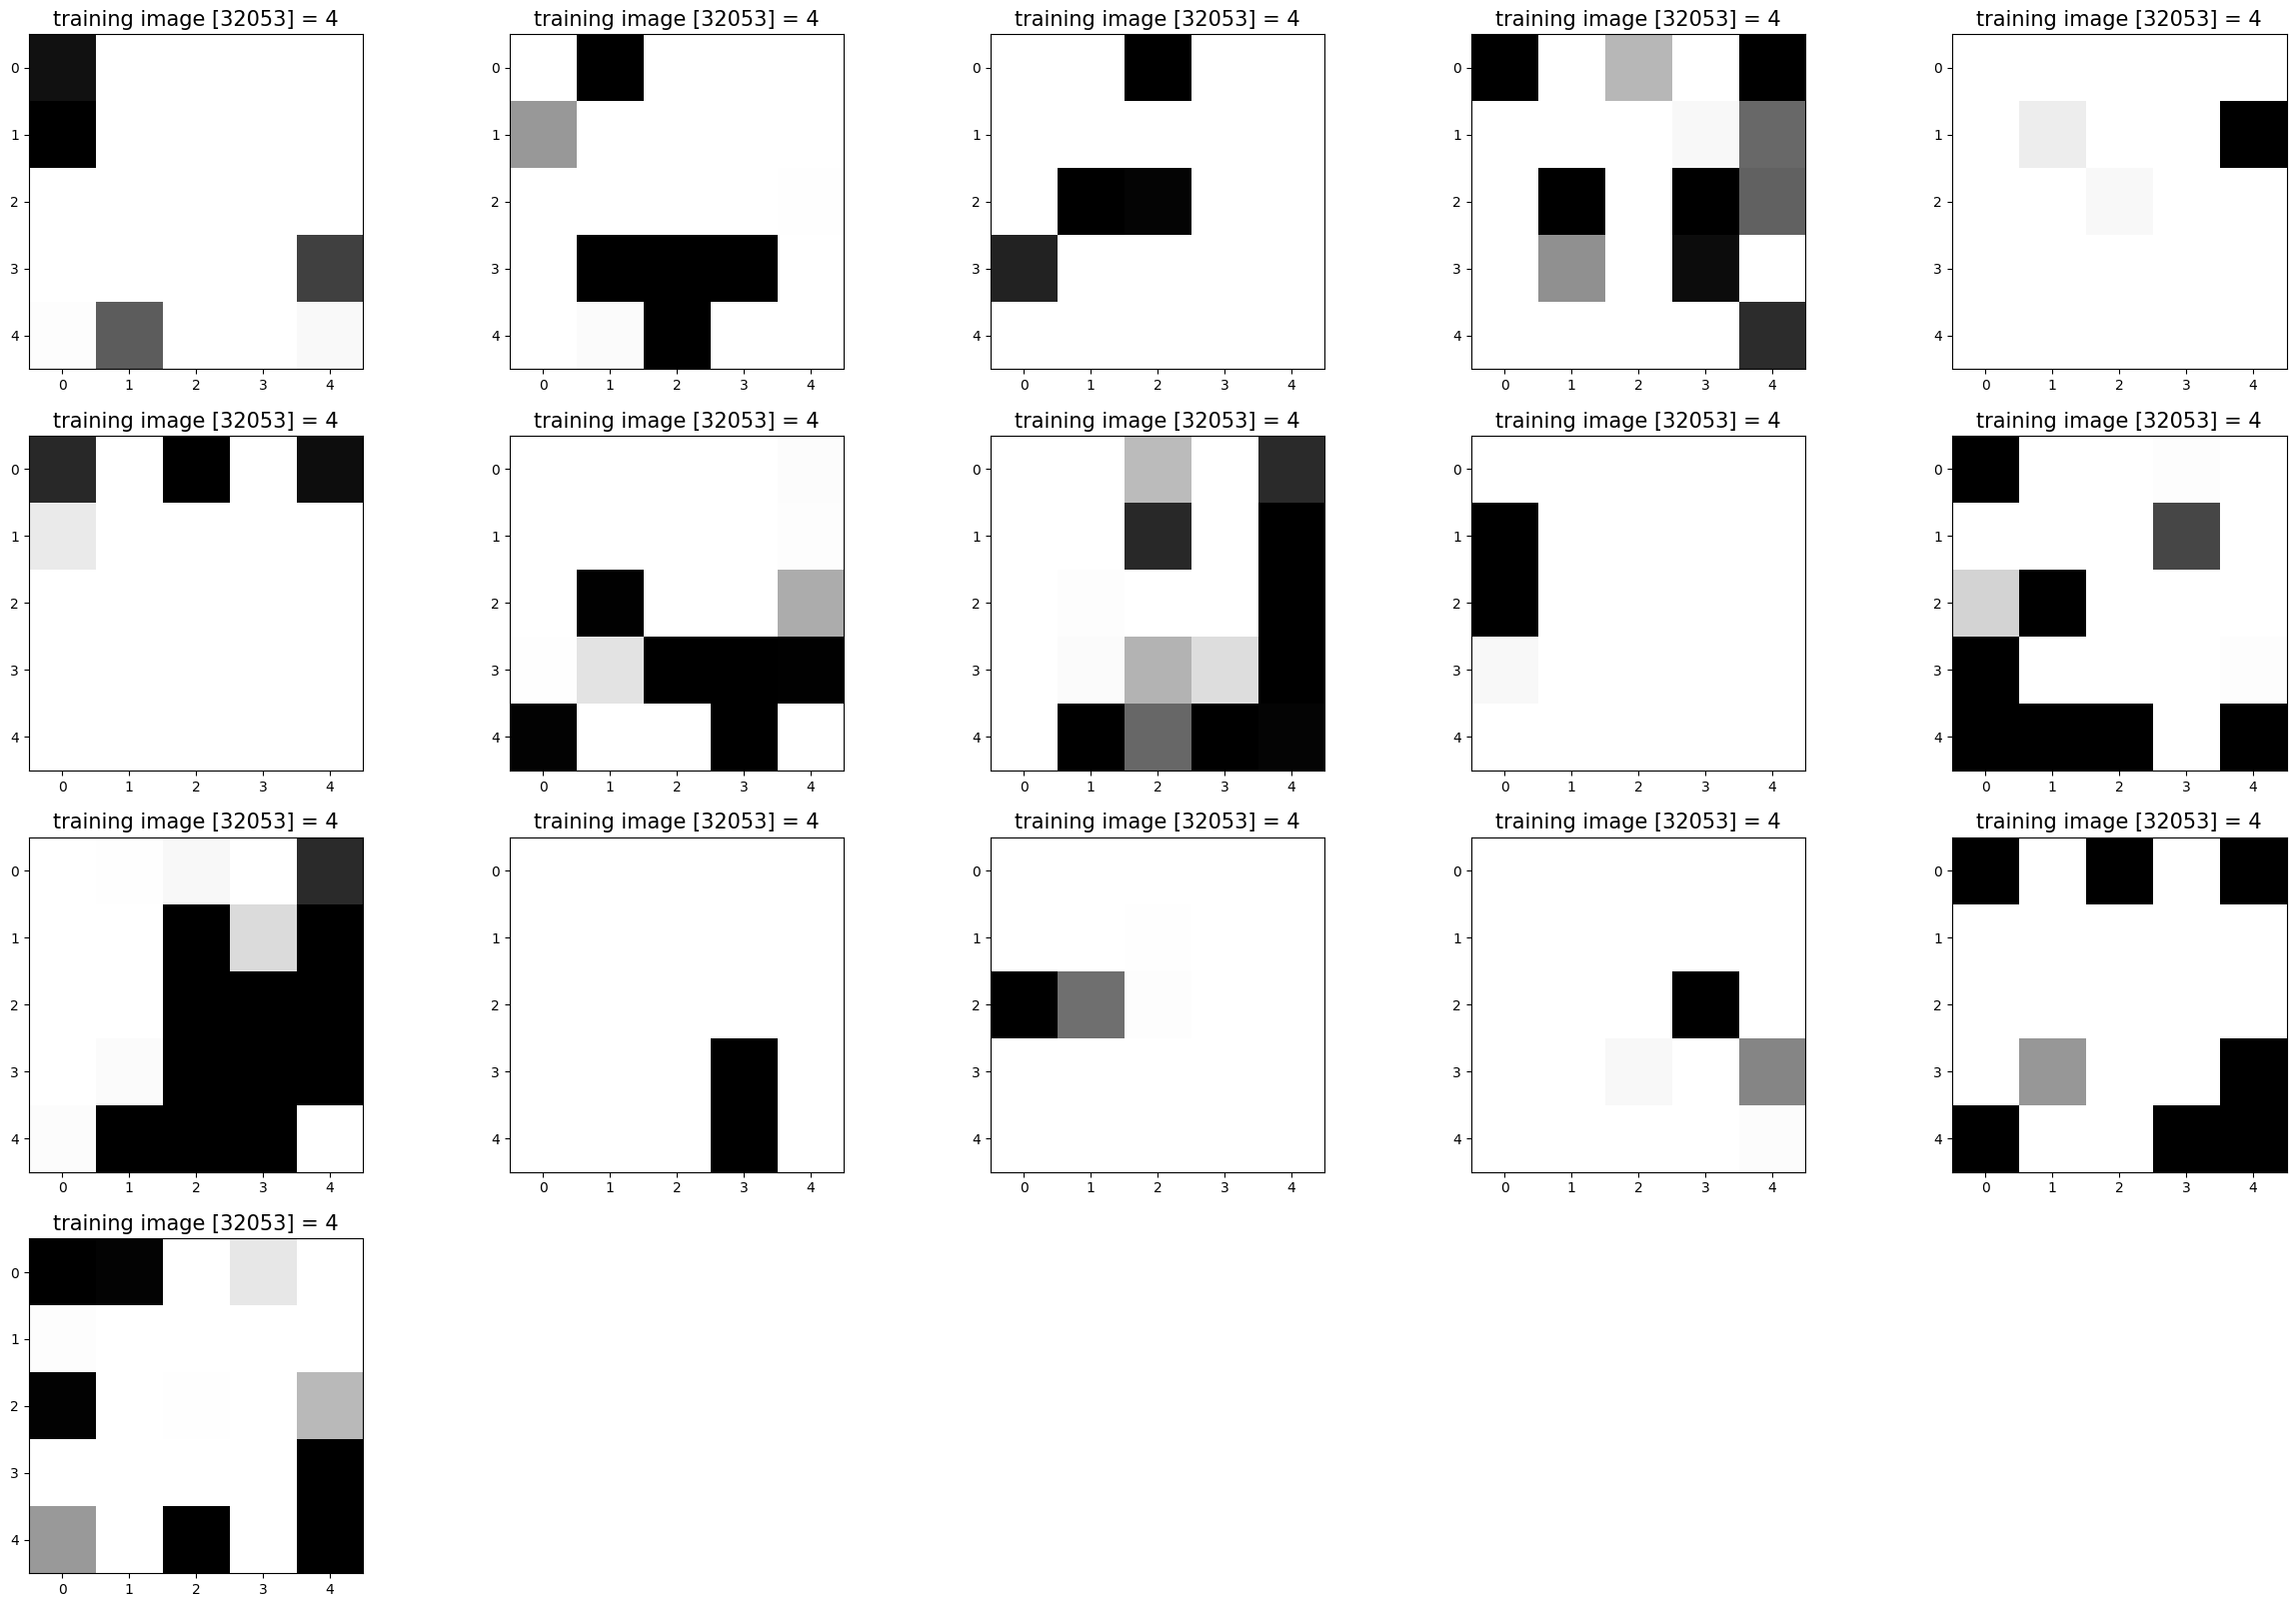

In [12]:

import numpy as np

layer_4_max_filter = []
for images in layer_3_5x5x6_conv_filter:
    image_post_max = []
    for i in range(2,len(images)+1,2):
        row = []
        for j in range(2,len(images)+1,2):
            row.append(np.max([images[i-2:i,j-2:j]]))
        image_post_max.append(row)
    layer_4_max_filter.append(torch.tensor(image_post_max))

show_images(layer_4_max_filter, titles_2_show*16)

LAYER 5
convolution kernel filter #2
5x5x16

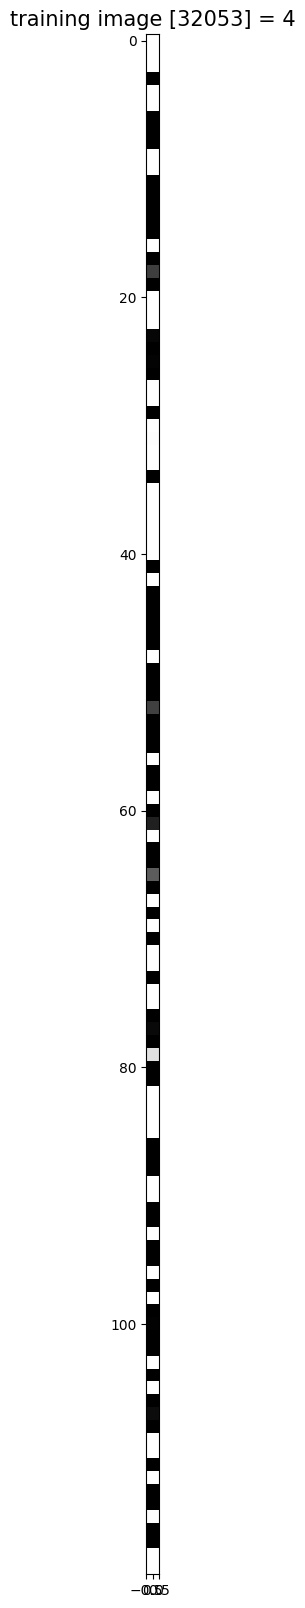

In [13]:
import numpy as np

def apply_kernel(img, kernel):
    return np.sum(np.multiply(img, kernel))

layer_5_5x5x16_conv_filter = []
for filters in range(120):
    kernel = [torch.randn(16,5,5)]
    # [z y x]
    
    images = layer_4_max_filter[0]
    image_post_kernal = []
    for i in range(5,len(images)+1):
        temp_5x5x6 = []
        for iter in range(len(layer_4_max_filter)):
            image = layer_4_max_filter[iter]
            temp_5x5x6.append(image[i-5:i,0:5])
        row = apply_kernel(temp_5x5x6, kernel)
        image_post_kernal.append(row)
    layer_5_5x5x16_conv_filter.append(torch.tensor(image_post_kernal))

#BIAS
for iter in range(120):
    bias120x1 = torch.randn(1)
    layer_5_5x5x16_conv_filter[iter] += bias120x1

#ACTIVATION
for iter in range(120):
    layer_5_5x5x16_conv_filter[iter] = torch.tensor([activation_function(layer_5_5x5x16_conv_filter[iter])])

show_images([layer_5_5x5x16_conv_filter], titles_2_show)

LAYER 6
Fully connected layer #1

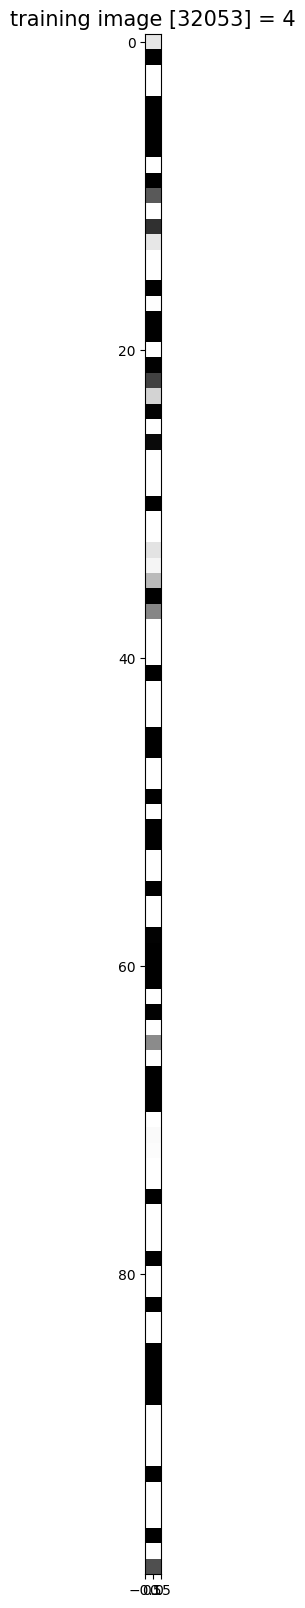

In [14]:
import numpy as np

def apply_kernel(img, kernel):
    return np.sum(np.multiply(img, kernel))

layer_6_1x100_fully_connected = []
for iter in range(100):
    kernel = [torch.randn(120,1)]
    # print(apply_kernel(layer_5_5x5x16_conv_filter, kernel))
    row = torch.tensor([apply_kernel(layer_5_5x5x16_conv_filter, kernel)])
    layer_6_1x100_fully_connected.append(row)
    # break

#BIAS
for iter in range(100):
    bias120x1 = torch.randn(1)
    layer_6_1x100_fully_connected[iter] += bias120x1
    
for iter in range(100):
    for i in range(len(layer_6_1x100_fully_connected[iter])):
        layer_6_1x100_fully_connected[iter][i] = activation_function(layer_6_1x100_fully_connected[iter][i])

show_images([layer_6_1x100_fully_connected], titles_2_show)

FINAL LAYER
Probabillity layer
len = 10

[tensor([1.3752]), tensor([-1.7159]), tensor([1.7159]), tensor([1.7157]), tensor([-1.7159]), tensor([-1.7159]), tensor([-1.7159]), tensor([-1.7150]), tensor([1.7159]), tensor([-1.7159]), tensor([-0.4998]), tensor([1.7159]), tensor([-1.0549]), tensor([1.3854]), tensor([1.7155]), tensor([1.7159]), tensor([-1.7159]), tensor([1.6975]), tensor([-1.7159]), tensor([-1.7159]), tensor([1.7159]), tensor([-1.6962]), tensor([-0.8208]), tensor([1.1375]), tensor([-1.6865]), tensor([1.7159]), tensor([-1.5694]), tensor([1.7155]), tensor([1.7159]), tensor([1.7159]), tensor([-1.7159]), tensor([1.7159]), tensor([1.7159]), tensor([1.3496]), tensor([1.5726]), tensor([0.7829]), tensor([-1.7148]), tensor([0.0908]), tensor([1.7159]), tensor([1.7159]), tensor([1.7158]), tensor([-1.7159]), tensor([1.7159]), tensor([1.7159]), tensor([1.7159]), tensor([-1.7159]), tensor([-1.7159]), tensor([1.7159]), tensor([1.7101]), tensor([-1.7138]), tensor([1.7159]), tensor([-1.7159]), tensor([-1.7159]), tensor([1.7159]), tens

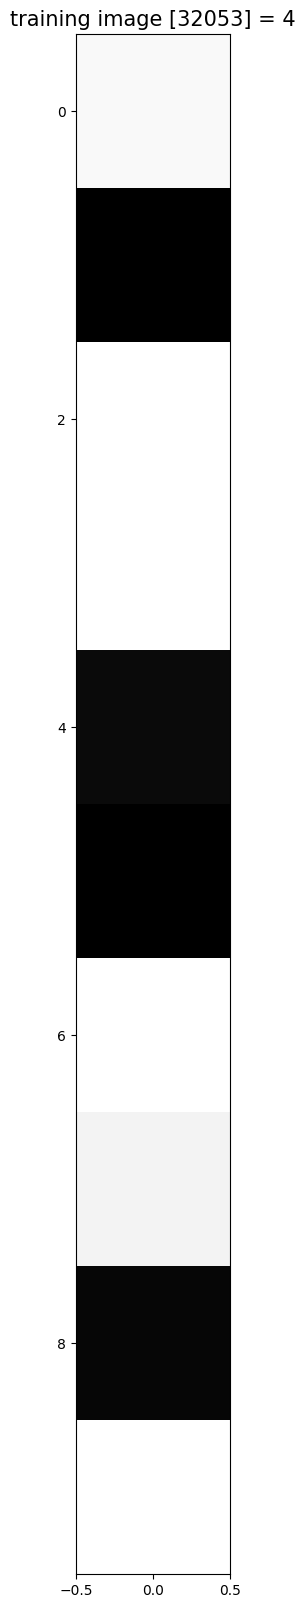

In [ ]:
import numpy as np
import torch

def calc_RBF(img, kernel):
    print(np.sum(np.square(np.subtract(img, kernel))))

    return np.sum(np.square(np.subtract(img, kernel)))
print(layer_6_1x100_fully_connected)
layer_7_1x10_conv_filter = []
for iter in range(10):
    row = []
    kernel = [(1.7159 / 3) * torch.randn((100,1))]
    row.append(calc_RBF(layer_6_1x100_fully_connected, kernel))
    layer_7_1x10_conv_filter.append(torch.tensor(row))

#BIAS
for iter in range(10):
    bias10x1 = 0
    layer_7_1x10_conv_filter[iter] += bias10x1
    
for iter in range(10):
    for i in range(len(layer_7_1x10_conv_filter[iter])):
        layer_7_1x10_conv_filter[iter][i] = activation_function(layer_7_1x10_conv_filter[iter][i])

print(layer_7_1x10_conv_filter)
show_images([layer_7_1x10_conv_filter], titles_2_show)